In [250]:
from os import listdir
from os.path import isfile
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize

In [386]:
path = './data_signature/'

folders = listdir(path)
list_of_img = []
imglabels = {'170401076':'0', '150401006':'1', '150401043':'2', '160401002':'3', '160401027':'4', 
          '160401043':'5', '160401048':'6', '160401050':'7', '160401051':'8', '170401011':'9', 
          '170401012':'10', '170401025':'11', '170401070':'12', '170401073':'13'}
y = []
X_test = []
y_test = []

for folder in folders:
    
    print(folder)
    for i in range(1,32):
        imgpath = path + folder + '/' + folder + '_'
        if i<10:
            imgpath = imgpath + '0' + str(i) + '.png'
        elif i>10 and i!=31:
            imgpath = imgpath + str(i) + '.png'
        else:
            imgpath = imgpath + 'test.png'

        img = plt.imread(imgpath)
        img = img[:,:,0]
        img = resize(img, (200,200))
        img = np.ndarray.flatten(img)
        
        if i==31:
            X_test.append(img)
            y_test.append(imglabels[folder])
        
        else:
            list_of_img.append(img)
            y.append(imglabels[folder])

170401070
160401051
160401027
150401006
160401043
160401050
160401048
170401025
170401073
150401043
160401002
170401012
170401011
170401076


In [387]:
len(list_of_img)

420

In [388]:
X = np.array(list_of_img)
y = np.array(y, dtype=object)

In [389]:
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=object)

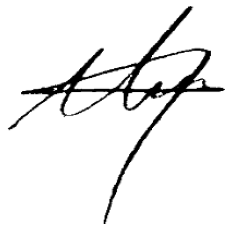

2


In [390]:
i = 290
plt.imshow(X[i].reshape(200,200), cmap ='gray')
plt.axis("off")
plt.show()
print(y[i])

In [358]:
(X.shape), (y.shape), (X_test.shape, y_test.shape)

((420, 40000), (420,), ((14, 40000), (14,)))

In [359]:
y

array(['12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '12', '12', '12', '12', '12', '12', '12', '12', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7

In [360]:
X = X / 255

In [361]:
X_test = X_test / 255

In [362]:
digits = 14

examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [363]:
digits = 14

examples = y_test.shape[0]

y_test = y_test.reshape(1, examples)

Yt_new = np.eye(digits)[y_test.astype('int32')]
Yt_new = Yt_new.T.reshape(digits, examples)

In [364]:
(y.shape, Y_new.shape), (y_test.shape, Yt_new.shape)

(((1, 420), (14, 420)), ((1, 14), (14, 14)))

In [365]:
m = 420
m_test = X.shape[0] - m

#X_train, X_test = X[:m].T, X[m:].T
#Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
X_train = X[:m].T
Y_train = Y_new[:,:m]
X_test = X_test.T
Y_test = Yt_new

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

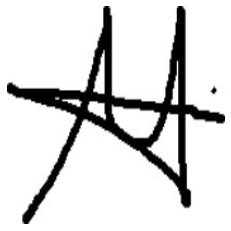

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [366]:
i = 12
plt.imshow(X_train[:,i].reshape(200,200), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [367]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [368]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [369]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.129691227684796
Epoch 100 cost:  2.3172819468561356
Epoch 200 cost:  1.9736987632014191
Epoch 300 cost:  1.6664362796179564
Epoch 400 cost:  1.4002113197208075
Epoch 500 cost:  1.1763110970269586
Epoch 600 cost:  0.991541096662376
Epoch 700 cost:  0.8403212386469642
Epoch 800 cost:  0.7167457565806938
Epoch 900 cost:  0.6155347945036037
Epoch 1000 cost:  0.5322781617325266
Epoch 1100 cost:  0.463413005433301
Epoch 1200 cost:  0.4061098000142321
Epoch 1300 cost:  0.35813612790742916
Epoch 1400 cost:  0.3177301253716263
Epoch 1500 cost:  0.2834956313471312
Epoch 1600 cost:  0.2543202536963825
Epoch 1700 cost:  0.22931286946662505
Epoch 1800 cost:  0.20775612522590398
Epoch 1900 cost:  0.1890700970082767
Final cost: 0.1729364778162306


In [370]:
from sklearn.metrics import classification_report, confusion_matrix

In [371]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00 

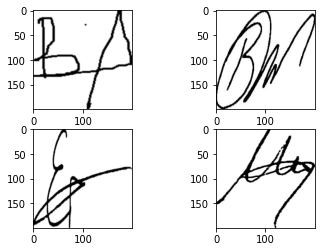

In [385]:

plt.subplot(2,2,1)
plt.imshow(X[:,91].reshape(200,200), cmap ='gray')
plt.subplot(2,2,2)
plt.imshow(X[:,160].reshape(200,200), cmap ='gray')
plt.subplot(2,2,3)
plt.imshow(X[:,410].reshape(200,200), cmap ='gray')
plt.subplot(2,2,4)
plt.imshow(X[:,312].reshape(200,200), cmap ='gray')
plt.show()

#### Veri boyutunu 28x28 aldığımda bir kaç imzayı yanlış tahmin etti ve accuracy 0.71 di. Veri setinin küçük olmasından ve veri boyutunun 28x28 olmasından dolayı bir kaç yanlış tahmin olduğunu düşünüyorum. Veri boyutunu 200x200 olarak değiştirdiğimde bütün imzaları doğru tahmin etti.